# Polynomial Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values # only second column (index #1)
y = dataset.iloc[:, -1].values # only last column (Salary)

In [3]:
print(X) # feature or independent variable

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
print(y) # dependent variable

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


## Training the Linear Regression model on the whole dataset

In [5]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Training the Polynomial Regression model on the whole dataset

In [6]:
from sklearn.preprocessing import PolynomialFeatures
regressor_polyn = PolynomialFeatures(degree=2) # 0, 1, 2
X_polyn = regressor_polyn.fit_transform(X) # [ X^0, X^1, X^2 ]

In [7]:
print(X_polyn)

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


In [8]:
regressor = LinearRegression()
regressor.fit(X_polyn, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predicting with the Linear Regression

In [9]:
y_pred_linear = regressor_linear.predict(X)

In [10]:
print(y_pred_linear)

[-114454.54545455  -33575.75757576   47303.03030303  128181.81818182
  209060.60606061  289939.39393939  370818.18181818  451696.96969697
  532575.75757576  613454.54545455]


## Visualising the Linear Regression results

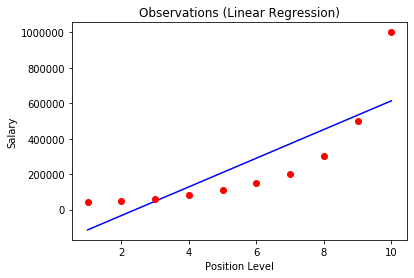

In [11]:
plt.scatter(X, y, color='red', zorder=2) # observations
plt.plot(X, y_pred_linear, color='blue', zorder=1) # linear model
plt.title('Observations (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Predicting with the Polynomial Regression

In [12]:
y_pred = regressor.predict(X_polyn)

In [13]:
print(y_pred)

[118727.27272727  44151.51515152   8439.39393939  11590.90909091
  53606.06060606 134484.84848485 254227.27272727 412833.33333333
 610303.03030303 846636.36363636]


## Visualising the Polynomial Regression results

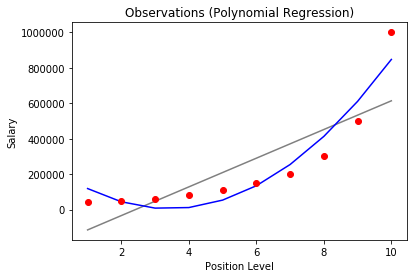

In [14]:
plt.scatter(X, y, color='red', zorder=3) # observations
plt.plot(X, y_pred_linear, color='grey', zorder=1) # linear model
plt.plot(X, y_pred, color='blue', zorder=2) # polynomial model
plt.title('Observations (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Training a Better Polynomial Regression results  
Higher degree

In [15]:
from sklearn.preprocessing import PolynomialFeatures
regressor_polyn_hi = PolynomialFeatures(degree=4) # 0, 1, 2, 3, 4
X_polyn_hi = regressor_polyn_hi.fit_transform(X) # [ X^0, X^1, X^2, X^3, X^4 ]

In [16]:
print(X_polyn_hi)

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


In [17]:
regressor_hi = LinearRegression()
regressor_hi.fit(X_polyn_hi, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predicting with the Better Polynomial Regression

In [18]:
y_pred_hi = regressor_hi.predict(X_polyn_hi)

In [19]:
print(y_pred_hi)

[ 53356.64335691  31759.90676     58642.19114225  94632.86713296
 121724.94172506 143275.05827517 184003.49650353 289994.17249408
 528694.63869438 988916.08391567]


## Visualising the Better Polynomial Regression results

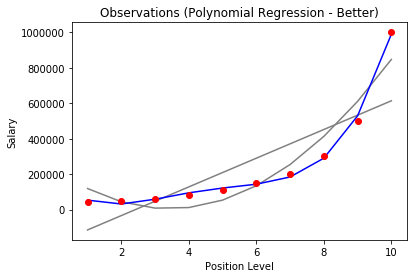

In [20]:
plt.scatter(X, y, color='red', zorder=4) # observations
plt.plot(X, y_pred_linear, color='grey', zorder=1) # linear model
plt.plot(X, y_pred, color='grey', zorder=2) # polynomial model
plt.plot(X, y_pred_hi, color='blue', zorder=3) # polynomial model
plt.title('Observations (Polynomial Regression - Better)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising results with better resolution and smoother curve

add interpolated values for X axis

In [21]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

get interpolated values for Y axis (grade 2 model)

In [22]:
regressor_polyn_grid = regressor_polyn.fit_transform(X_grid)
y_grid = regressor.predict(regressor_polyn_grid)

get interpolated values for Y axis (grade 4 model)

In [23]:
regressor_polyn_grid_hi = regressor_polyn_hi.fit_transform(X_grid)
y_grid_hi = regressor_hi.predict(regressor_polyn_grid_hi)

plot the two smoothed curves for the polynomial models

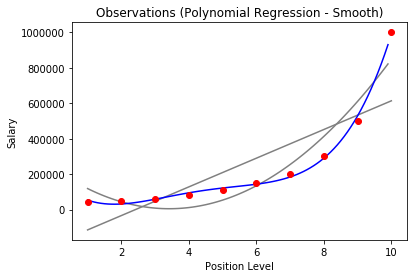

In [24]:
plt.scatter(X, y, color='red', zorder=4) # observations
plt.plot(X, y_pred_linear, color='grey', zorder=1) # linear model
plt.plot(X_grid, y_grid, color='grey', zorder=2) # polynomial model
plt.plot(X_grid, y_grid_hi, color='blue', zorder=3) # polynomial model
plt.title('Observations (Polynomial Regression - Smooth)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result with Linear Regression

In [25]:
x_test_linear = [[6.5]] # the model needs an array
regressor_linear.predict(x_test_linear) # bad prediction

array([330378.78787879])

## Predicting a new result with Polynomial Regression

In [26]:
x_test_polyn = regressor_polyn.fit_transform([[6.5]]) # the model needs an array ^0 ^1 ^2
regressor.predict(x_test_polyn) # fair prediction

array([189498.10606061])

## Predicting a new result with Better Polynomial Regression

In [27]:
x_test_polyn_hi = regressor_polyn_hi.fit_transform([[6.5]]) # the model needs an array ^0 ^1 ^2 ^3 ^4
regressor_hi.predict(x_test_polyn_hi) # good prediction

array([158862.4526516])